# Telecom Customer Churn Prediction
By Hans Darmawan - JCDS2602

---
## Section 1. Business Understanding
### 1.1 Background

XYZ Company is a leading telecommunications provider known for its innovative services and customer-centric approach. Operating in a highly competitive market, XYZ Company offers a wide range of telecom solutions, including mobile, broadband, and digital services, catering to both individual and business customers. Despite its strong market presence, XYZ Company faces challenges related to customer churn, a critical issue that impacts its revenue and growth. By leveraging data analytics and customer insights, XYZ Company aims to mitigate churn and enhance customer retention, ensuring long-term sustainability and profitability in the dynamic telecom industry.

Customer churn in the telecom industry refers to the rate at which existing customers discontinue using a telecom service within a specific period. This phenomenon is critical because it directly affects a company's revenue and profitability. Customers may churn due to dissatisfaction with service quality, uncompetitive pricing, poor customer support, or more attractive offers from competitors. Understanding and managing churn is essential for telecom companies to maintain a stable customer base and financial health (O'Brien & Downie, 2024; Britto, 2024; Luck, 2023; Investopedia Team, 2024).

Churn is essentially the opposite of customer retention, measuring the number of customers lost over a given timeframe. In subscription-based services like telecom, churn immediately impacts revenue since it involves the loss of recurring payments. The churn rate is calculated as the percentage of customers lost relative to the total number of customers at the start of the period. For example, if a company starts with 300 customers and loses 50 within a year, the churn rate is approximately 16.67% (Luck, 2023).

In the telecom sector, churn is particularly significant because high churn rates can lead to financial losses and hinder growth. Acquiring new customers is often more expensive than retaining existing ones, making it vital for companies to focus on reducing churn by improving service quality, offering competitive pricing, and enhancing customer engagement (O'Brien & Downie, 2024; Luck, 2023; Britto, 2024; Investopedia Team, 2024).

### 1.2 Gap Analysis
The gap analysis for the telecom customer churn prediction project identifies key areas for improvement. Currently, the company lacks a predictive model to identify customers at risk of churning, which limits its ability to implement effective retention strategies. There are significant gaps in data quality, stakeholder engagement, and model interpretability, which can hinder informed decision-making. Additionally, establishing a continuous improvement process is essential to adapt to changing customer behaviors, along with integrating predictive insights into operational workflows. By addressing these gaps, the company can reduce churn rates, enhance customer retention, and improve overall business performance.

### 1.3 Problem Statements
- Which customers are likely to churn?
- What factors influence customer churn the most?
- How can the company reduce churn and improve customer retention?

### 1.4 Goals
- Develop a predictive model to classify customers as churn or no churn.
    + In the telecom sector, predicting which customers are likely to churn involves analyzing customer data to identify patterns and behaviors that indicate a high risk of leaving. This can be achieved by using machine learning models trained on historical data. Classification models are commonly used for this purpose (Kumari et al., 2025; IQ Team, 2025). By identifying at-risk customers, companies can implement targeted retention strategies to reduce churn.
- Identify key features affecting churn.
    + Understanding the factors that drive customer churn is essential for developing effective retention strategies. Feature importance analysis from machine learning models helps identify which attributes have the strongest impact on churn likelihood. For instance, high monthly charges or poor customer service experiences are often significant predictors of churn (Kumari et al., 2025; Bhatnagar & Srivastava, 2025). By focusing on these key factors, businesses can optimize their services and improve customer satisfaction.
- Provide actionable insights for business to reduce churn.
    + To reduce churn and enhance retention, telecom companies can leverage insights from predictive models to implement targeted strategies. These may include offering personalized plans, discounts, or improved customer support to at-risk customers. Additionally, addressing common issues highlighted by churn predictors—such as high costs or poor service quality—can reduce overall churn rates. By combining predictive insights with business actions, companies can maximize customer lifetime value and reduce acquisition costs, which are typically higher than retention costs (BlastChar, 2018; Bhatnagar & Srivastava, 2025).

### 1.5 Analytical Approach
- Business Understanding  
    + The problem of customer churn is identified as a critical challenge for XYZ Telecom. A predictive model is required to address this issue effectively. The business impact of churn is analyzed to ensure long-term profitability.  
- Data Understanding  
    + The dataset is explored to uncover patterns and anomalies. Missing values and duplicates are checked to ensure data quality. Distributions of key features are visualized to understand their relationships with churn.  
- Data Preparation  
    + The target variable is converted into a binary format for modeling. Categorical features are encoded. The data is split into training and testing sets for evaluation.  
- Modeling  
    + Multiple machine learning algorithms and numerical scaling methods are tested to identify the best performer. Class imbalance is addressed using resampling techniques. Decision thresholds are optimized to improve recall for churn prediction.  
- Evaluation  
    + Model performance is measured using recall. Key drivers of churn are interpreted using explainability tools. A confusion matrix is generated to visualize prediction accuracy.  
- Deployment  
    + The final model is saved for future use. Predictions are made on new customer data to flag churn risks.
### 1.6 Metric Evaluation
- Business Metric: Reduction in churn rate.
- Machine Learning Evaluation Metric: Accuracy, Precision, Recall, F1-score, ROC-AUC.

### 1.7 Success Criteria
- Achieve high classification performance on recall (>=80).
- Provide interpretable insights for business decisions.
- Demonstrate model effectiveness on unseen data.

## Section 2. Data Understanding
### 2.1 Dataset Information

In [1]:
# Suppress specific warnings to avoid hiding important alerts
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress only ConvergenceWarning
warnings.filterwarnings('ignore')

# Core data manipulation libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Set Seaborn theme for better aesthetics
sns.set_theme()

# Statistical modeling and diagnostics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Machine learning and preprocessing libraries
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, FunctionTransformer, MinMaxScaler

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, 
                              AdaBoostClassifier, BaggingClassifier)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier

# Imbalanced data handling
from imblearn.over_sampling import SMOTE, ADASYN

# Model selection and evaluation tools
from sklearn.model_selection import (train_test_split, cross_val_score, StratifiedKFold, 
                                     RandomizedSearchCV, learning_curve)
from sklearn.metrics import (classification_report, roc_auc_score, brier_score_loss,
                             precision_recall_curve, roc_curve, f1_score, recall_score,
                             confusion_matrix)
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

# Other utilities
from scipy.stats import uniform
import shap
import joblib
import os

# Configure pandas display options for better visibility
pd.set_option('display.max_columns', None)

# Load dataset with error handling
data_path = r'C:\Users\User\Documents\Purwadhika\JCDS 2602\Capstone Project\telco-churn\data\raw\data.csv'

try:
    if os.path.exists(data_path):
        real_df = pd.read_csv(data_path)
    else:
        raise FileNotFoundError(f"Data file not found at {data_path}")
except Exception as e:
    print(f"An error occurred while loading the dataset: {e}")
    raise

# Create a copy of the DataFrame for manipulation
df = real_df.copy()

# Show initial data info and preview
print(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB
None


,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


The provided summary of the DataFrame indicates that it contains a total of 4,930 entries, which represent individual customers or accounts. The DataFrame is structured with 11 columns, each capturing specific attributes related to the customers' service usage and characteristics.

Among the columns, the Dependents field identifies whether customers have dependents, while tenure reflects the duration, in months, that customers have maintained their service. Several columns, such as OnlineSecurity, OnlineBackup, DeviceProtection, and TechSupport, denote the availability of various service options, illustrating the range of features customers can choose. The InternetService column specifies the type of internet service provided, which may influence customer satisfaction and retention.

Additionally, the Contract column indicates the nature of the customer's agreement with the service provider, and PaperlessBilling shows whether customers have opted for electronic billing. The MonthlyCharges column presents the cost incurred by each customer monthly, providing insight into the pricing structure. Finally, the Churn column indicates whether a customer has discontinued their service, which is crucial for understanding customer retention and satisfaction. In details, the column breakdowns as per below:

<table>
    <tr>
        <th>Column Name</th>
        <th>Importance</th>
        <th>Impact to Business</th>
    </tr>
    <tr>
        <td>Dependents</td>
        <td>Moderate</td>
        <td>Understanding customer demographics can aid in targeted marketing strategies.</td>
    </tr>
    <tr>
        <td>Tenure</td>
        <td>High</td>
        <td>Longer tenure often indicates customer loyalty, impacting retention strategies.</td>
    </tr>
    <tr>
        <td>OnlineSecurity</td>
        <td>High</td>
        <td>Customers with online security are likely to feel safer, reducing churn.</td>
    </tr>
    <tr>
        <td>OnlineBackup</td>
        <td>Moderate</td>
        <td>Offering online backup can enhance customer satisfaction and retention.</td>
    </tr>
    <tr>
        <td>InternetService</td>
        <td>High</td>
        <td>Understanding service subscriptions helps in optimizing service offerings.</td>
    </tr>
    <tr>
        <td>DeviceProtection</td>
        <td>Moderate</td>
        <td>Device protection can be a key selling point for tech-savvy customers.</td>
    </tr>
    <tr>
        <td>TechSupport</td>
        <td>High</td>
        <td>Good tech support can significantly reduce churn and improve customer satisfaction.</td>
    </tr>
    <tr>
        <td>Contract</td>
        <td>High</td>
        <td>Contract types influence customer retention and revenue predictability.</td>
    </tr>
    <tr>
        <td>PaperlessBilling</td>
        <td>Moderate</td>
        <td>Encouraging paperless billing can reduce costs and appeal to environmentally conscious customers.</td>
    </tr>
    <tr>
        <td>MonthlyCharges</td>
        <td>High</td>
        <td>Understanding pricing impacts customer acquisition and retention strategies.</td>
    </tr>
    <tr>
        <td>Churn</td>
        <td>Critical</td>
        <td>Churn rate is a key performance indicator for business health and customer satisfaction. This column will be used as target.</td>
    </tr>
</table>

### 2.2 Missing Values Checking

Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
InternetService     0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64


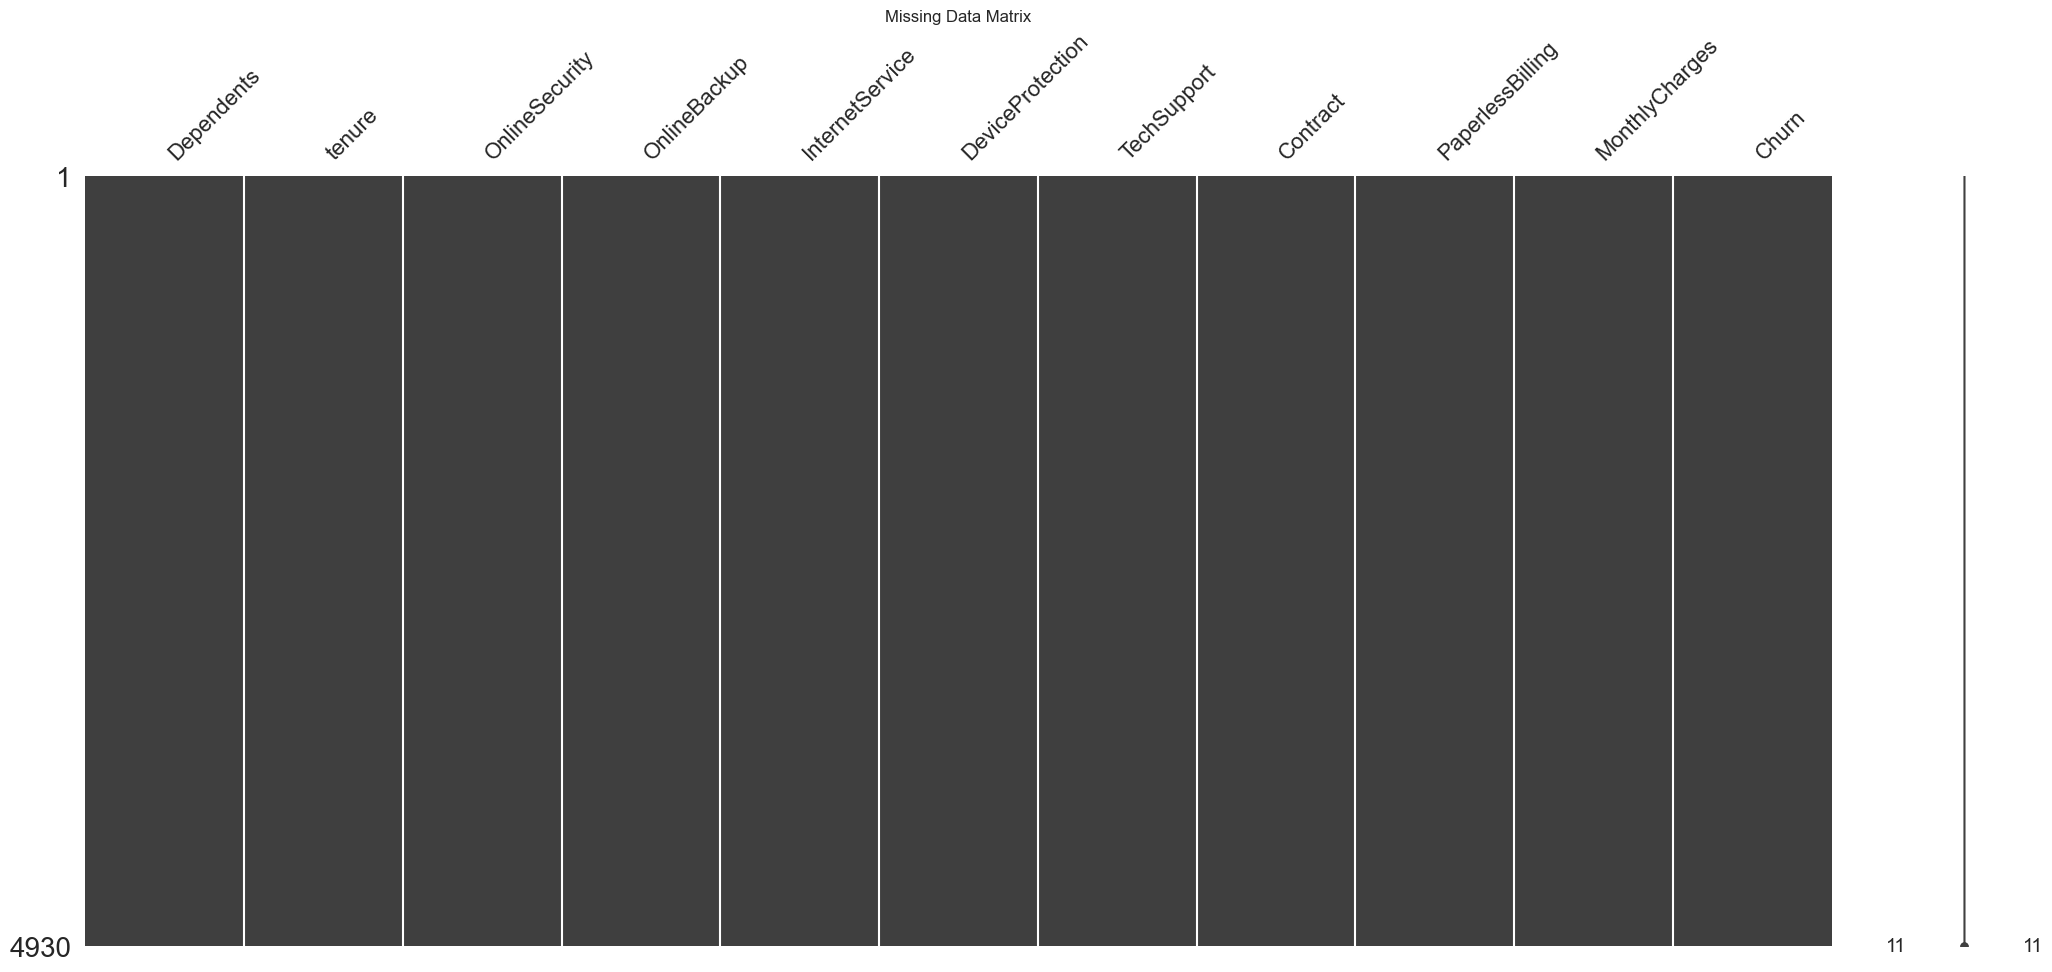

In [2]:
# Check missing values count per column
missing_counts = df.isnull().sum()
print(missing_counts)

# Visualize missing data pattern
msno.matrix(df)
plt.title('Missing Data Matrix')
plt.show()

The summary indicates that there are no missing values across any of the columns in the DataFrame, which consists of 4,930 entries. Each attribute, including Dependents, tenure, OnlineSecurity, OnlineBackup, InternetService, DeviceProtection, TechSupport, Contract, PaperlessBilling, MonthlyCharges, and Churn, has a complete dataset with zero missing entries. This completeness is crucial for conducting accurate analyses and drawing reliable conclusions.

The accompanying visual representation, a missing data matrix, further emphasizes this finding. Each column is displayed without any gaps, confirming that all data points are accounted for. This absence of missing values enhances the integrity of the dataset, allowing for more robust statistical evaluations and insights into customer behavior and service usage. Overall, the DataFrame is well-prepared for further analysis, ensuring that any insights derived will be based on a comprehensive and complete dataset.

### 2.3 Duplicated Values Checking

In [3]:
# Count duplicated rows
num_duplicates = df.duplicated().sum()
print(f"Number of duplicated rows: {num_duplicates}")

Number of duplicated rows: 77


The presence of 77 duplicated rows in this dataset indicates that these rows are exact copies of others within the same data. Such duplicates can arise from data entry errors, system issues, or legitimate repeated events depending on the context. However, removing duplicates is not always the best course of action.

One reason to retain duplicates is that they may represent valid repeated observations or transactions, which are important for accurate analysis. For example, in transactional data or repeated measurements, duplicates reflect real-world occurrences rather than errors. Removing them could distort data distributions and lead to misleading results. Additionally, duplicates can help validate data consistency and quality during data processing (Oracle Community, 2024).

Moreover, certain analytical methods and visualizations rely on the frequency of data points, where duplicates provide meaningful information rather than noise. Understanding the origin and significance of duplicates is essential before deciding to remove them, as their removal may compromise data integrity and analytical validity (Imhoff, Galemmo, & Geiger, 2003).

In summary, while duplicates often indicate data quality issues, they can also carry important information depending on the dataset and context. Careful assessment ensures that valuable data is preserved, supporting reliable and valid analysis.

### 2.4 Dataset Restructuring for Better EDA

In [4]:
# Convert object columns to category dtype
object_cols = df.select_dtypes(include=['object']).columns.tolist()
df[object_cols] = df[object_cols].astype('category')

# Confirm changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Dependents        4930 non-null   category
 1   tenure            4930 non-null   int64   
 2   OnlineSecurity    4930 non-null   category
 3   OnlineBackup      4930 non-null   category
 4   InternetService   4930 non-null   category
 5   DeviceProtection  4930 non-null   category
 6   TechSupport       4930 non-null   category
 7   Contract          4930 non-null   category
 8   PaperlessBilling  4930 non-null   category
 9   MonthlyCharges    4930 non-null   float64 
 10  Churn             4930 non-null   category
dtypes: category(9), float64(1), int64(1)
memory usage: 121.6 KB


The DataFrame is restructured for better Exploratory Data Analysis (EDA) because the initial data types are not relevant. This restructuring is performed to enhance the efficiency and clarity of the data, which is crucial for effective analysis. The object columns are converted to categorical data type, a process that is often necessary to ensure that the data is properly formatted for statistical and machine learning tasks (McKinney, 2017; VanderPlas, 2016).

The conversion of object columns to categorical data type is achieved by using the astype('category') method in Pandas. This approach not only improves memory efficiency but also ensures that the data is treated appropriately during analysis. The changes are confirmed by checking the updated data types of the DataFrame using the info() method, which provides a summary of the DataFrame's structure and memory usage (McKinney, 2017; VanderPlas, 2016).

The restructuring process is facilitated by identifying the object columns and applying the necessary conversion. This step is essential in maintaining data integrity and ensuring that the analysis is conducted on the correct data types. The use of categorical data types can also help in reducing errors that might arise from treating categorical variables as strings (Wickham & Grolemund, 2017; McKinney, 2017).

### 2.5 Exploratory Data Analysis (EDA)
#### 2.5.1 Outlier Analysis

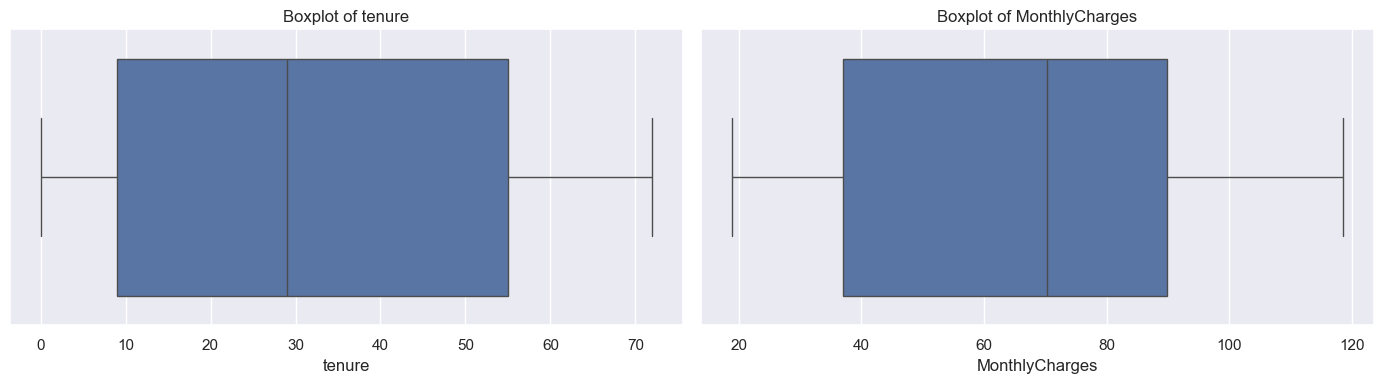

In [5]:
numerics = df.select_dtypes(include=['float64','int64']).columns.tolist()

# Create dynamic grid based on number of numeric columns
num_plots = len(numerics)
cols = 2
rows = (num_plots + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(cols * 7, rows * 4))
axes = axes.flatten()

for i, col in enumerate(numerics):
    sns.boxplot(x=df[col], orient='h', ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### 2.5.2 Unique Values Analysis

In [6]:
cat_cols = df.select_dtypes(include=['category']).columns

# Dictionary of unique counts per categorical column
unique_counts = {col: df[col].nunique() for col in cat_cols}

# Dictionary of unique values lists per categorical column
unique_values_list = {col: df[col].unique().tolist() for col in cat_cols}

unique_summary = pd.DataFrame({'unique_counts': unique_counts, 'unique_values': unique_values_list})
unique_summary

,unique_counts,unique_values
Dependents,2,"[Yes, No]"
OnlineSecurity,3,"[No, Yes, No internet service]"
OnlineBackup,3,"[No, Yes, No internet service]"
InternetService,3,"[DSL, Fiber optic, No]"
DeviceProtection,3,"[Yes, No internet service, No]"
TechSupport,3,"[Yes, No, No internet service]"
Contract,3,"[Month-to-month, Two year, One year]"
PaperlessBilling,2,"[Yes, No]"
Churn,2,"[Yes, No]"


#### 2.5.3 Proportion Analysis

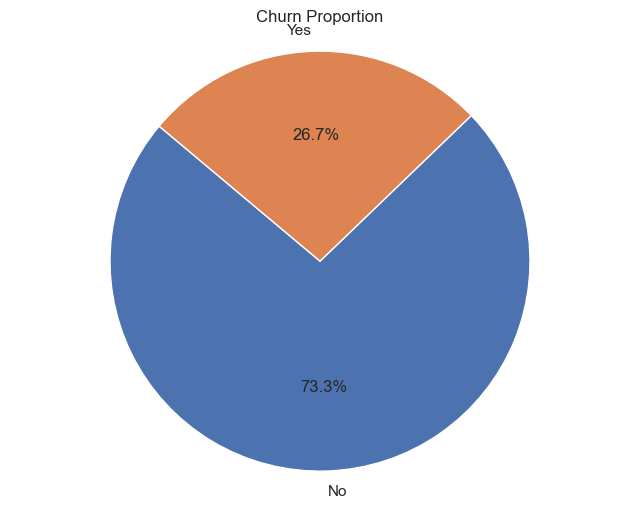

In [7]:
churn_proportion = df['Churn'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
plt.pie(churn_proportion, labels=churn_proportion.index, autopct='%1.1f%%', startangle=140)
plt.title('Churn Proportion')
plt.axis('equal')  # Equal aspect ratio ensures pie chart is circular
plt.show()

#### 2.5.4 Feature Distribution Analysis (Categorical)

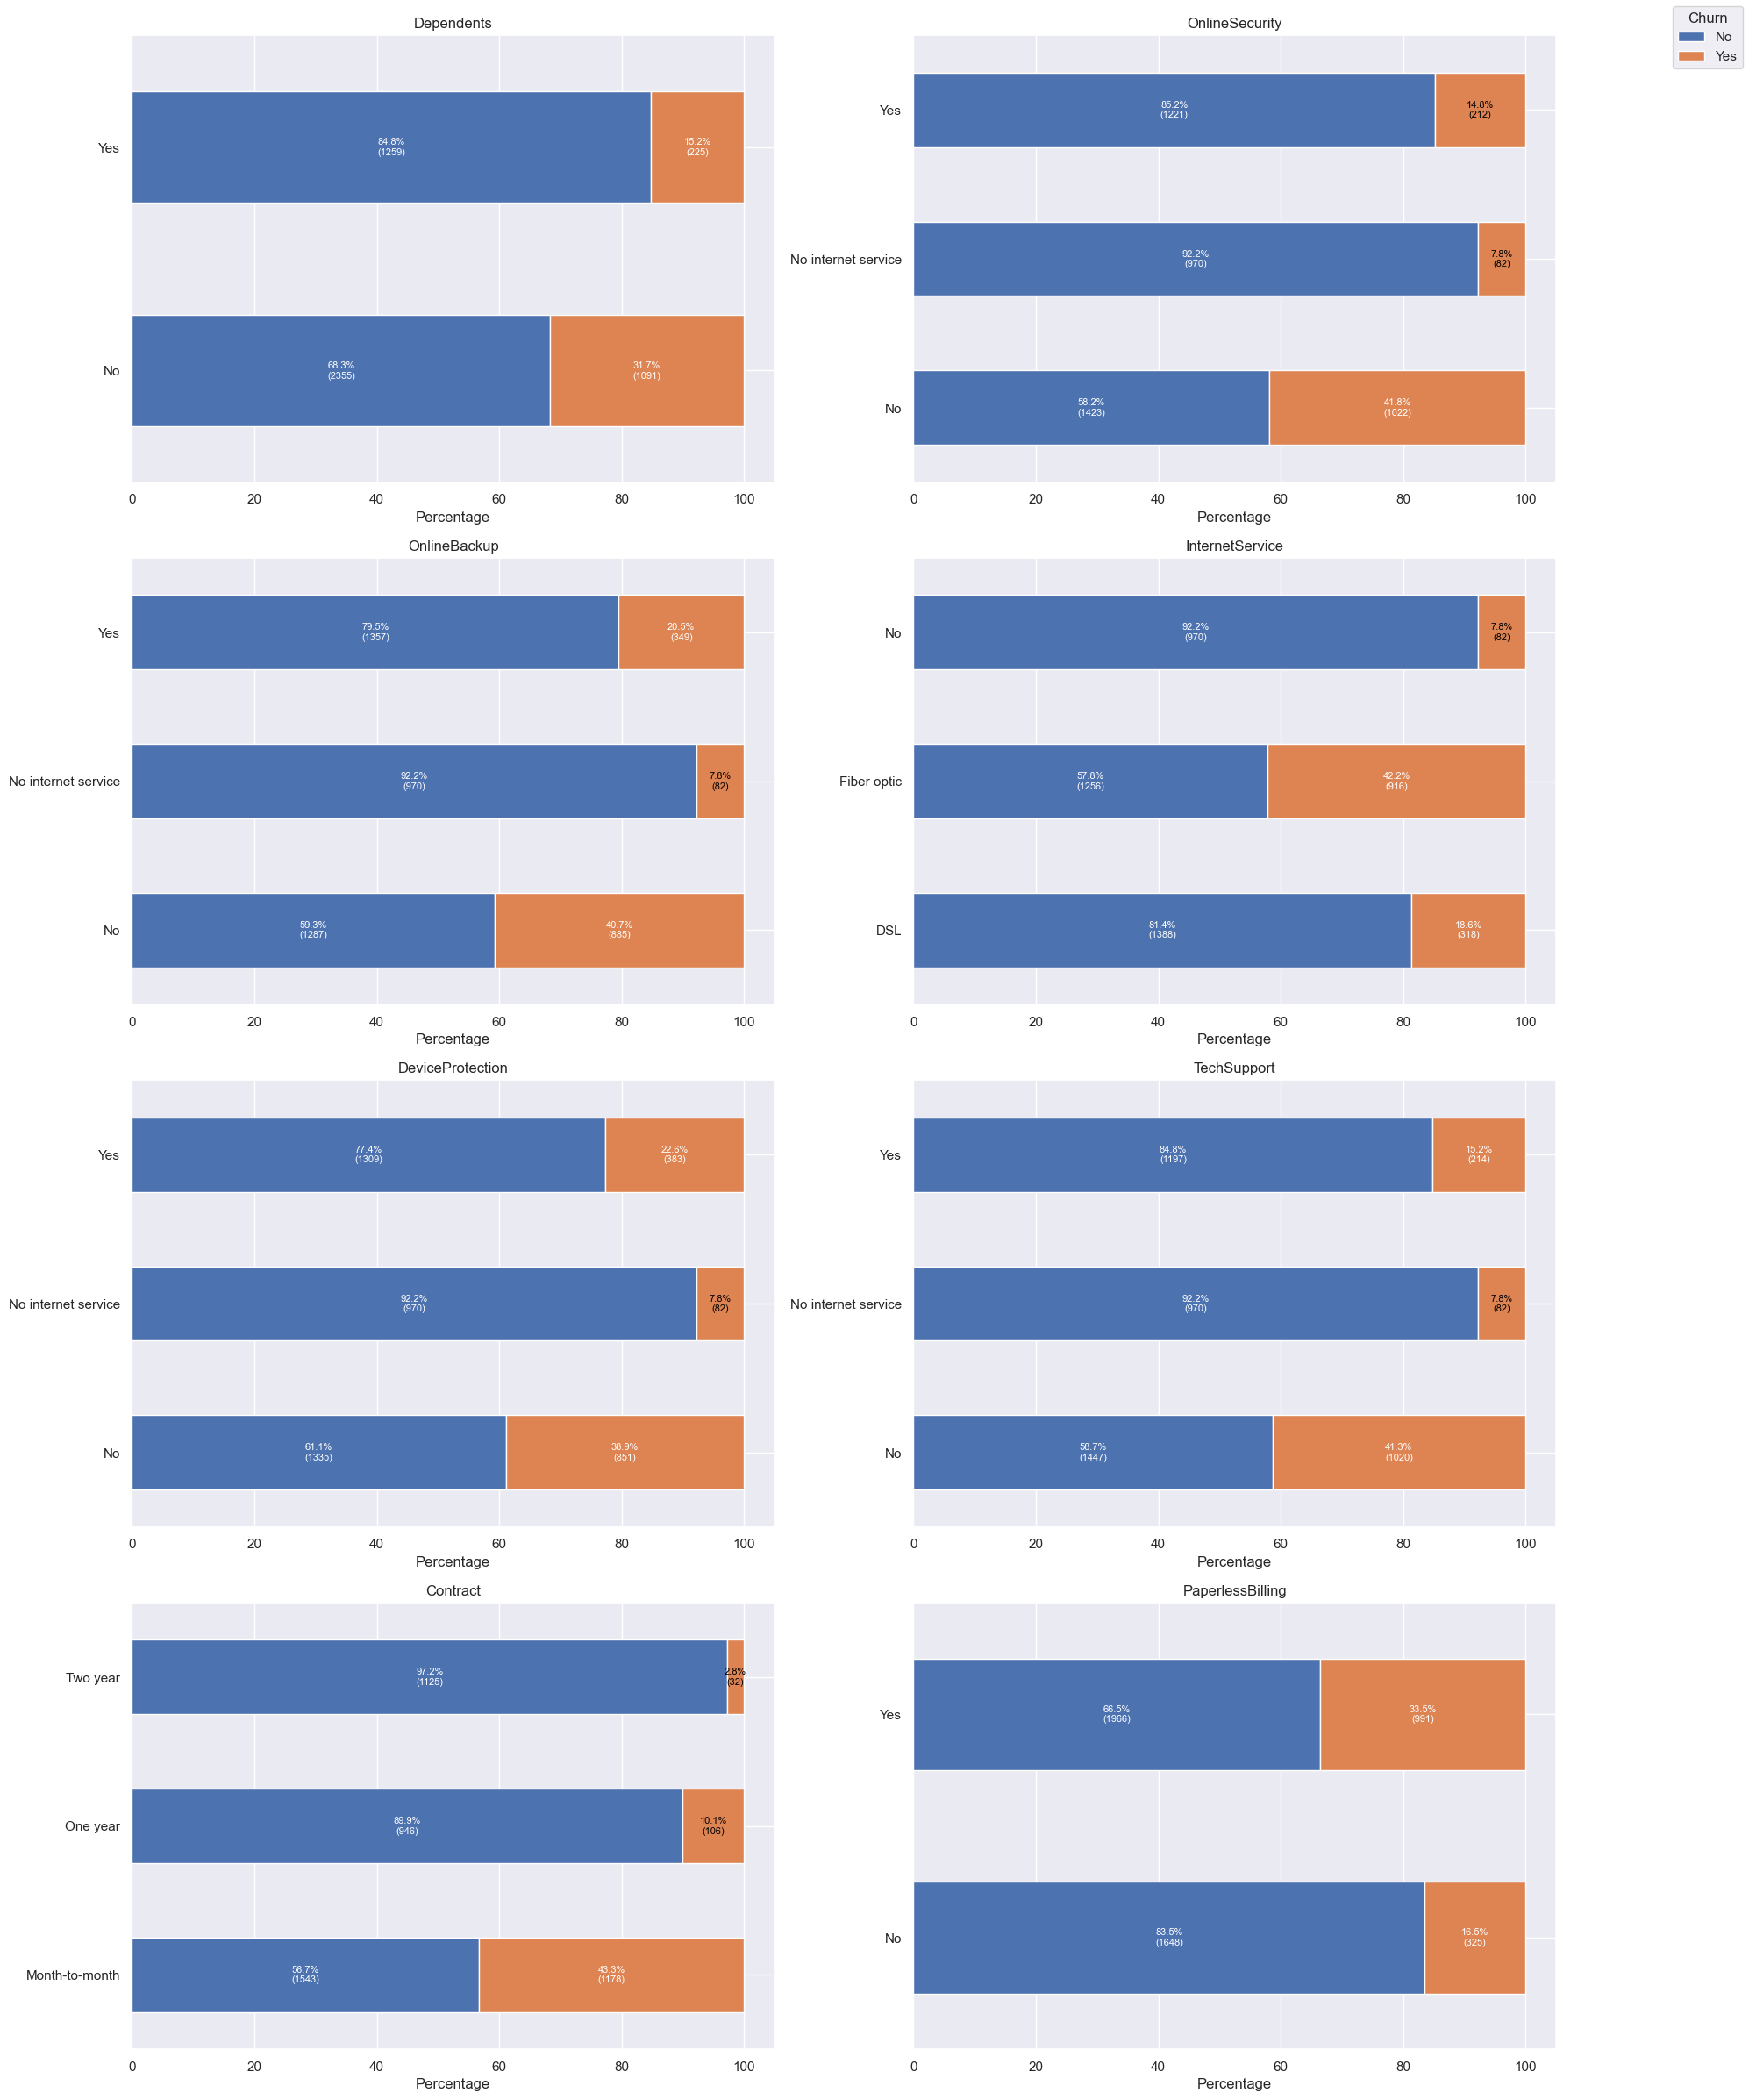

In [8]:
categorical_cols = df.select_dtypes(include='category').columns.drop('Churn')

num_plots = len(categorical_cols)
cols = 2
rows = (num_plots + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(cols * 10, rows * 6))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    ax = axes[i]
    
    # Compute counts per category and churn status with observed=True
    counts = df.groupby([col, 'Churn'], observed=True).size().unstack(fill_value=0)
    
    # Convert counts to percentages per category level (row-wise)
    percentages = counts.div(counts.sum(axis=1), axis=0) * 100
    
    # Plot horizontal stacked bar chart on the subplot axis
    percentages.plot(kind='barh', stacked=True, ax=ax, legend=False)
    
    ax.set_title(f'{col}')
    ax.set_xlabel('Percentage')
    ax.set_ylabel('')
    
    # Annotate each segment with percentage and count
    for j, (index, row) in enumerate(percentages.iterrows()):
        cum_width = 0
        for churn_status in percentages.columns:
            pct = row[churn_status]
            cnt = counts.loc[index, churn_status]
            if pct > 0:
                label = f'{pct:.1f}%\n({cnt})'
                ax.text(cum_width + pct / 2, j, label, ha='center', va='center', fontsize=8,
                        color='white' if pct > 15 else 'black')
                cum_width += pct

# Remove any unused subplots
for k in range(i + 1, len(axes)):
    fig.delaxes(axes[k])

# Create one legend for all plots
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, title='Churn', loc='upper right')

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Leave space on right for legend
plt.show()

#### 2.5.5 Correlation Analysis

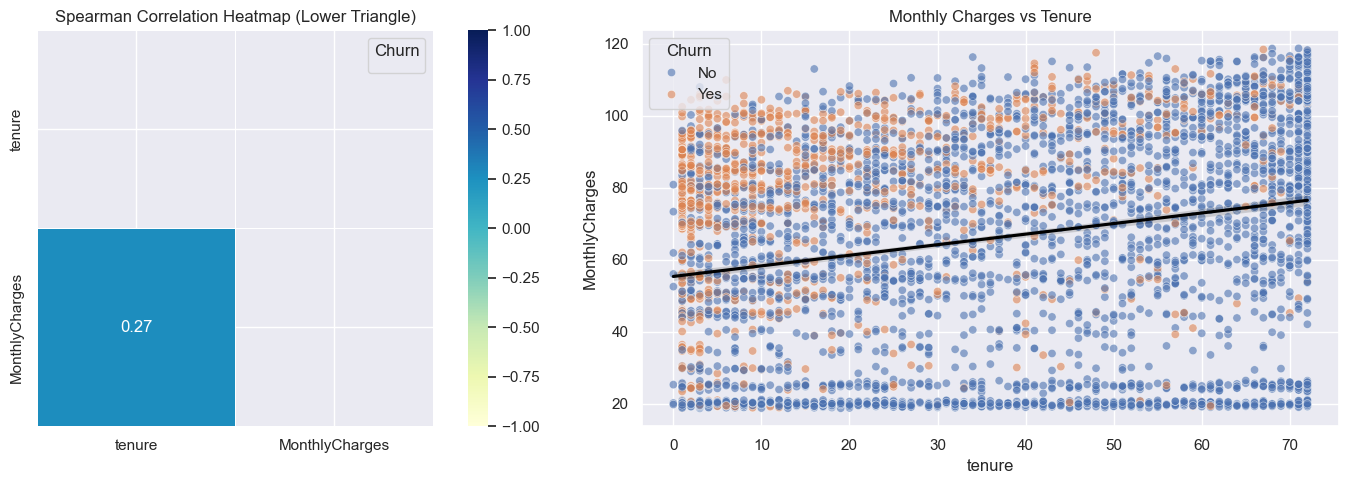

In [9]:
# Compute Spearman correlation matrix for numeric columns
corr = df.corr(numeric_only=True, method='spearman')

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 1st subplot: KDE plot for 'tenure' by 'Churn'
sns.heatmap(corr, mask=mask, annot=True, cmap='YlGnBu', vmin=-1, vmax=1, square=True, linewidths=0.5, ax=axes[0])
axes[0].set_title('Spearman Correlation Heatmap (Lower Triangle)')

# 2nd subplot: Scatter plot for 'MonthlyCharges' vs 'tenure' colored by 'Churn'
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn', ax=axes[1], alpha=0.6)

# Add regression line to the scatter plot
sns.regplot(data=df, x='tenure', y='MonthlyCharges', ax=axes[1], scatter=False, color='black')

axes[1].set_title('Monthly Charges vs Tenure')

# Show the legend
for ax in axes:
    ax.legend(title='Churn')

# Adjust layout
plt.tight_layout()
plt.show()


#### 2.5.6 Feature Distribution Analysis (Numerical)

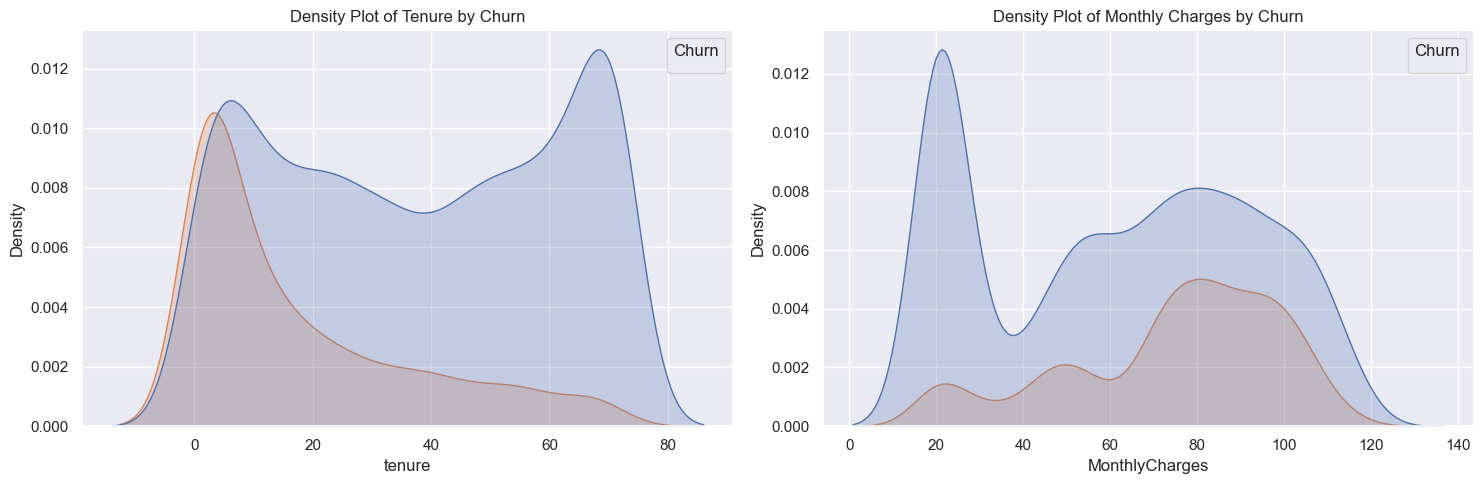

In [10]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 1st subplot: KDE plot for 'tenure' by 'Churn'
sns.kdeplot(data=df, x='tenure', hue='Churn', fill=True, ax=axes[0])
axes[0].set_title('Density Plot of Tenure by Churn')

# 2nd subplot: KDE plot for 'MonthlyCharges' by 'Churn'
sns.kdeplot(data=df, x='MonthlyCharges', hue='Churn', fill=True, ax=axes[1])
axes[1].set_title('Density Plot of Monthly Charges by Churn')

# Show the legend
for ax in axes:
    ax.legend(title='Churn')

# Adjust layout
plt.tight_layout()
plt.show()


#### 2.5.7 Statistics Summary

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tenure,4930.0,32.401217,24.501193,0.0,9.00,29.00,55.00,72.00
MonthlyCharges,4930.0,64.883032,29.923960,18.8,37.05,70.35,89.85,118.65


In [12]:
df.describe(include=['object','category']).transpose()

,count,unique,top,freq
Dependents,4930,2,No,3446
OnlineSecurity,4930,3,No,2445
OnlineBackup,4930,3,No,2172
InternetService,4930,3,Fiber optic,2172
DeviceProtection,4930,3,No,2186
TechSupport,4930,3,No,2467
Contract,4930,3,Month-to-month,2721
PaperlessBilling,4930,2,Yes,2957
Churn,4930,2,No,3614


## Section 3. Data Preparation
### 3.1 Feature Engineering

In [13]:
df['TotalCharges'] = df['tenure'] * df['MonthlyCharges']

### 3.2 Target Labeling

In [14]:
# Map target variable 'Churn' from Yes/No to 1/0
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

### 3.3 Define Features and Target

In [15]:
# Define feature matrix X and target vector y
X = df.drop(columns=['Churn'])
y = df['Churn']

### 3.4 Train-Test Split

In [16]:
# Stratified split to maintain target distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### 3.5 Data Transformation Setup

In [17]:
# Identify categorical columns excluding target
categorical_cols = [col for col in df.select_dtypes(include=['category']).columns if col != 'Churn']

# Identify numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Identify binary columns (with exactly 2 unique values excluding 'Churn')
binary_cols = unique_summary[unique_summary['unique_counts'] == 2].index.tolist()
binary_cols = [col for col in binary_cols if col != 'Churn']

# Separate categorical columns into binary and non-binary
categorical_cols_no_binary = [col for col in categorical_cols if col not in binary_cols]

# Function to map 'No'->0 and 'Yes'->1 in binary columns
def map_binary_yes_no(X):
    if not isinstance(X, pd.DataFrame):
        X = pd.DataFrame(X, columns=binary_cols)
    for col in X.columns:
        X[col] = X[col].map({'No': 0, 'Yes': 1})
        if X[col].isnull().any():
            raise ValueError(f"Unexpected values found in column {col} during binary mapping.")
        X[col] = X[col].astype(np.int64)
    return X.values

# Function to create numeric transformer pipeline based on the scaler type
scalers = [RobustScaler(), MinMaxScaler()]
def create_numeric_transformer(scaler):
    return Pipeline(steps=[
        ('scaler', scaler)
    ])

# Function to create preprocessor with the desired scaling method
def create_preprocessor(scaler):
    numeric_transformer = create_numeric_transformer(scaler)

    binary_transformer = Pipeline(steps=[
        ('map_yes_no', FunctionTransformer(map_binary_yes_no))
    ])

    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
    ])

    return ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_cols),
            ('binary', binary_transformer, binary_cols),
            ('cat', categorical_transformer, categorical_cols_no_binary)
        ],
        remainder='passthrough'
    )

## Section 4. Modeling
### 4.1 Model Initialization and Cross-Validation

In [18]:
# Define models with random_state and n_jobs where applicable
models = {
    'Logistic Regression': LogisticRegression(random_state=42, n_jobs=-1, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Bagging': BaggingClassifier(random_state=42, n_jobs=-1),
    'SVM': SVC(probability=True, random_state=42),
    'k-NN': KNeighborsClassifier(n_jobs=-1),
    'XGBoost': XGBClassifier(random_state=42, n_jobs=-1, use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': lgb.LGBMClassifier(random_state=42, n_jobs=-1),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0, thread_count=-1)
}

# Define scoring metrics
scoring = ['recall']  # Add other metrics if needed

# Cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize list to store scores
list_scores = []

# Iterate over each scaler
for scaler in scalers:
    for model_name, model in models.items():
        preprocessor = create_preprocessor(scaler)  # Create preprocessor with the current scaler
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', model)
        ])
        for score in scoring:
            scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring=score, n_jobs=-1)
            list_scores.append({
                'Model': model_name,
                'Metric': score,
                'Mean Score': np.mean(scores),
                'Std Dev': np.std(scores),
                'Scaler': 'Robust' if isinstance(scaler, RobustScaler) else 'MinMax'
            })

# Create DataFrame from scores
results_df = pd.DataFrame(list_scores)
results_df = results_df.sort_values(by=['Mean Score', 'Std Dev'], ascending=[False, True])

# Find the best score for each metric
best_scores = results_df.loc[results_df.groupby(['Metric'])['Mean Score'].idxmax()]

# Extract the best model and scaler overall
overall_best = best_scores.loc[best_scores['Mean Score'].idxmax()]
best_model = overall_best['Model']
best_scaler = overall_best['Scaler']

# Display the best scalers for each metric
print("Best Scalers for Each Metric:")
display(best_scores[['Metric', 'Model', 'Scaler', 'Mean Score', 'Std Dev']])

print(f"\nOverall Best Model: {best_model} with {best_scaler} Scaler")

# Define the best scaler based on the identified best scaler
if best_scaler == 'Robust':
    best_scaler_instance = RobustScaler()
else:
    best_scaler_instance = MinMaxScaler()

# Update the preprocessor variable with the best scaler
preprocessor = create_preprocessor(best_scaler_instance)

# Now you can use the updated preprocessor in your final model pipeline
best_base_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', models[best_model])  # Use the best model from the results
])

# Display the final best pipeline
display(best_base_pipeline)

Best Scalers for Each Metric:


,Metric,Model,Scaler,Mean Score,Std Dev
0,recall,Logistic Regression,Robust,0.534687,0.030207



Overall Best Model: Logistic Regression with Robust Scaler


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('binary',
                                                  Pipeline(steps=[('map_yes_no',
                                                                   FunctionTransformer(func=<function map_binary_yes_no at 0x000001BE60600AE0>))]),
                                                  ['Dependents',
                                                   'PaperlessBilling']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['OnlineSecurity',
                                                   'OnlineBackup',
                                                   'InternetService',
                                                   'DeviceProtection',
                                                   'TechSupport',
                                                   'Contract'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, n_jobs=-1,
                                    random_state=42))])

### 4.2 VIF Analysis
Calculate Variance Inflation Factor to detect multicollinearity.

In [19]:
# Fit preprocessor on training data
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Function to get feature names after preprocessing
def get_feature_names(preprocessor):
    feature_names = []
    feature_names.extend(numeric_cols)
    feature_names.extend(binary_cols)
    ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
    cat_features = ohe.get_feature_names_out(categorical_cols_no_binary)
    feature_names.extend(cat_features)
    return feature_names

feature_names = get_feature_names(preprocessor)

# Convert to DataFrame for VIF calculation
X_vif = pd.DataFrame(X_train_preprocessed, columns=feature_names)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

vif_data.sort_values(by='VIF', ascending=False)

,feature,VIF
13,TechSupport_No internet service,inf
11,DeviceProtection_No internet service,inf
5,OnlineSecurity_No internet service,inf
10,InternetService_No,inf
7,OnlineBackup_No internet service,inf
2,TotalCharges,11.758656
1,MonthlyCharges,7.662679
0,tenure,6.604636
9,InternetService_Fiber optic,3.994744
16,Contract_Two year,3.103916


### 4.3 VIF Selector Transformer and Hyperparameter Tuning

In [20]:
class VIFSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to remove features with high Variance Inflation Factor (VIF).
    """
    def __init__(self, threshold=10):
        self.threshold = threshold
        self.features_to_drop_ = []
        self.feature_names_ = None

    def fit(self, X, y=None):
        if hasattr(X, "toarray"):
            X = X.toarray()
        X_df = pd.DataFrame(X, columns=self.feature_names_)

        vif_data = pd.DataFrame()
        vif_data['feature'] = X_df.columns
        vif_vals = []
        for i in range(X_df.shape[1]):
            try:
                vif = variance_inflation_factor(X_df.values, i)
            except Exception:
                vif = np.inf
            vif_vals.append(vif)
        vif_data['VIF'] = vif_vals

        self.features_to_drop_ = vif_data[(vif_data['VIF'] == np.inf) | (vif_data['VIF'] > self.threshold)]['feature'].tolist()
        return self

    def transform(self, X):
        if hasattr(X, "toarray"):
            X = X.toarray()
        X_df = pd.DataFrame(X, columns=self.feature_names_)
        X_reduced = X_df.drop(columns=self.features_to_drop_, errors='ignore')
        return X_reduced.values

    def set_feature_names(self, feature_names):
        self.feature_names_ = feature_names
        return self

# Initialize VIFSelector
vif_selector = VIFSelector(threshold=10).set_feature_names(feature_names)

# Logistic Regression model
logreg = LogisticRegression(random_state=42, max_iter=1000, n_jobs=-1)

# Resamplers for class imbalance
resamplers = {
    'SMOTE': SMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42)
}

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Parameter distributions for RandomizedSearchCV
param_dist = [
    {
        'classifier__penalty': ['l1', 'l2'],
        'classifier__solver': ['saga'],
        'classifier__C': uniform(0.001, 10)
    },
    {
        'classifier__penalty': ['elasticnet'],
        'classifier__solver': ['saga'],
        'classifier__l1_ratio': uniform(0, 1),
        'classifier__C': uniform(0.001, 10)
    }
]

best_results = {}

for name, sampler in resamplers.items():
    print(f"\nStarting RandomizedSearchCV with {name} resampler...")
    pipeline = ImbPipeline([
        ('preprocessor', preprocessor),
        ('vif_selector', vif_selector),
        ('resampler', sampler),
        ('classifier', logreg)
    ])

    random_search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_dist,
        n_iter=50,
        scoring='recall',
        cv=cv,
        verbose=2,
        random_state=42,
        n_jobs=-1,
        refit=True,
        error_score='raise'
    )

    random_search.fit(X_train, y_train)

    print(f"Best recall score with {name}: {random_search.best_score_:.4f}")
    print(f"Best parameters with {name}: {random_search.best_params_}")
    best_results[name] = random_search


Starting RandomizedSearchCV with SMOTE resampler...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best recall score with SMOTE: 0.7901
Best parameters with SMOTE: {'classifier__C': 0.05622117123602399, 'classifier__l1_ratio': 0.8154614284548342, 'classifier__penalty': 'elasticnet', 'classifier__solver': 'saga'}

Starting RandomizedSearchCV with ADASYN resampler...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best recall score with ADASYN: 0.8262
Best parameters with ADASYN: {'classifier__C': 0.05622117123602399, 'classifier__l1_ratio': 0.8154614284548342, 'classifier__penalty': 'elasticnet', 'classifier__solver': 'saga'}


### 4.4 Evaluate Best Model on Test Data

In [21]:
# Select best pipeline from SMOTE or ADASYN
best_tuned_pipeline = best_results['ADASYN'].best_estimator_
best_tuned_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('binary',
                                                  Pipeline(steps=[('map_yes_no',
                                                                   FunctionTransformer(func=<function map_binary_yes_no at 0x000001BE60600AE0>))]),
                                                  ['Dependents',
                                                   'PaperlessBilling']),
                                                 ('cat',
                                                  Pipeline...
                                                                                 handle_unknown='ignore'))]),
                                                  ['OnlineSecurity',
                                                   'OnlineBackup',
                                                   'InternetService',
                                                   'DeviceProtection',
                                                   'TechSupport',
                                                   'Contract'])])),
                ('vif_selector', VIFSelector()),
                ('resampler', ADASYN(random_state=42)),
                ('classifier',
                 LogisticRegression(C=0.05622117123602399,
                                    l1_ratio=0.8154614284548342, max_iter=1000,
                                    n_jobs=-1, penalty='elasticnet',
                                    random_state=42, solver='saga'))])

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.92      0.70      0.80       723
           1       0.50      0.84      0.63       263

    accuracy                           0.74       986
   macro avg       0.71      0.77      0.71       986
weighted avg       0.81      0.74      0.75       986

Recall Score: 0.8365


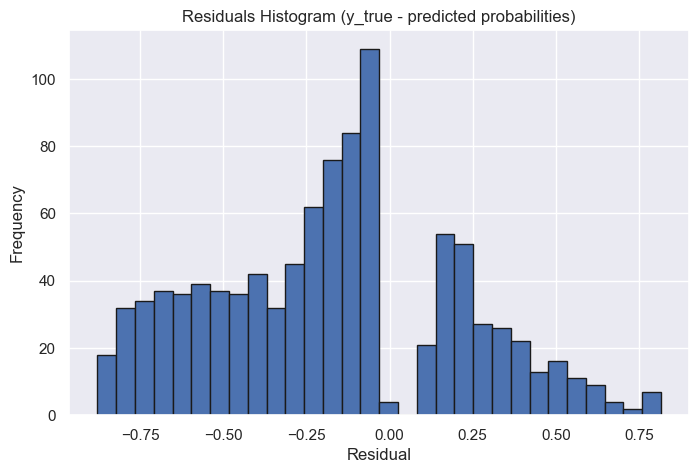

In [22]:
# Predict on test data
y_pred = best_tuned_pipeline.predict(X_test)
y_proba = best_tuned_pipeline.predict_proba(X_test)[:, 1]

# Classification report
print("Classification Report on Test Data:")
print(classification_report(y_test, y_pred))

# Recall score
recall = recall_score(y_test, y_pred)  # Using class predictions for recall
print(f"Recall Score: {recall:.4f}")

# Residual analysis: plot histogram of residuals (y_test - predicted probabilities)
residuals = y_test.astype(float) - y_proba
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=30, edgecolor='k')
plt.title("Residuals Histogram (y_true - predicted probabilities)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

### 4.5 Learning Curve

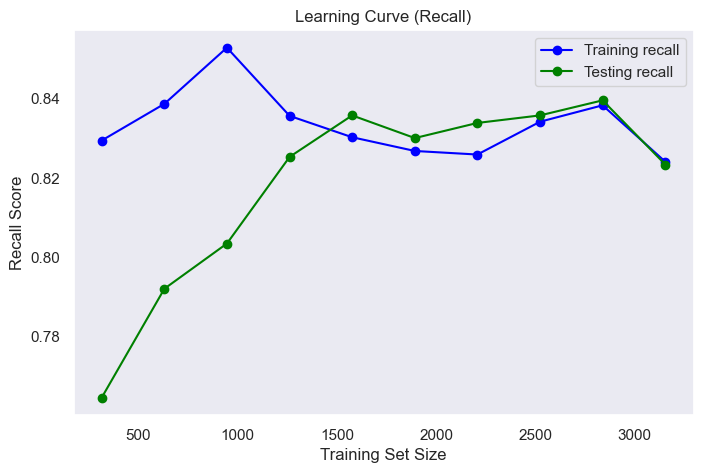

In [23]:
train_sizes, train_scores, test_scores = learning_curve(
    best_tuned_pipeline, X_train, y_train,
    cv=5, scoring='recall', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training recall')
plt.plot(train_sizes, test_scores_mean, 'o-', color='green', label='Testing recall')
plt.title('Learning Curve (Recall)')
plt.xlabel('Training Set Size')
plt.ylabel('Recall Score')
plt.legend(loc='best')
plt.grid()
plt.show()

### 4.6 Threshold Tuning Using Precision-Recall Curve

Best threshold by F1-score on PR curve: 0.5844
Precision: 0.5522, Recall: 0.7643, F1-score: 0.6411
Recall Score after threshold tuning (threshold=0.5844): 0.7643


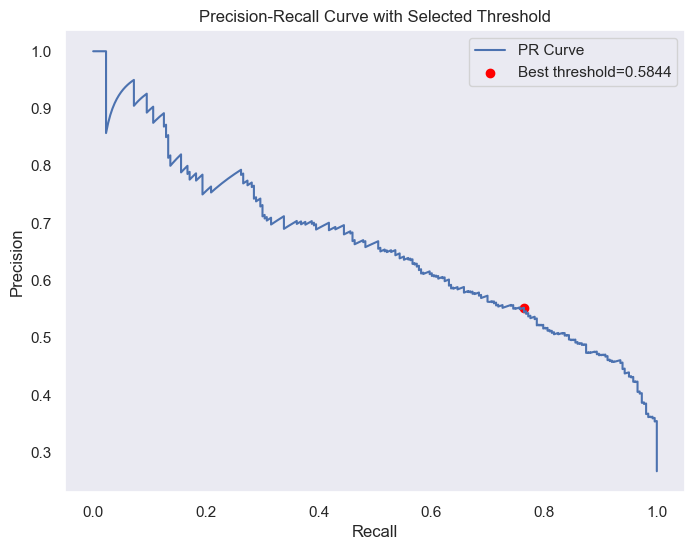

In [24]:
# Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_proba)

# Calculate F1 scores for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)  # avoid division by zero

# Find best threshold
best_idx_pr = f1_scores.argmax()
best_threshold_pr = thresholds_pr[best_idx_pr] if best_idx_pr < len(thresholds_pr) else 1.0

print(f"Best threshold by F1-score on PR curve: {best_threshold_pr:.4f}")
print(f"Precision: {precision[best_idx_pr]:.4f}, Recall: {recall[best_idx_pr]:.4f}, F1-score: {f1_scores[best_idx_pr]:.4f}")

# Apply new threshold
y_pred_pr = (y_proba >= best_threshold_pr).astype(int)
recall_after_pr = recall_score(y_test, y_pred_pr)
print(f"Recall Score after threshold tuning (threshold={best_threshold_pr:.4f}): {recall_after_pr:.4f}")

# Plot Precision-Recall Curve with best threshold
plt.figure(figsize=(8,6))
plt.plot(recall, precision, label='PR Curve')
plt.scatter(recall[best_idx_pr], precision[best_idx_pr], color='red', label=f'Best threshold={best_threshold_pr:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve with Selected Threshold')
plt.legend()
plt.grid()
plt.show()

## Section 5. Evaluation

### 5.1 Model Explanation Using Statsmodels

In [25]:
# Prepare data for statsmodels logistic regression
X_train_preprocessed = preprocessor.fit_transform(X_train)
feature_names = get_feature_names(preprocessor)

X_train_df = pd.DataFrame(X_train_preprocessed, columns=feature_names)

# Apply VIFSelector to remove high multicollinearity features
vif_selector = VIFSelector(threshold=10).set_feature_names(feature_names)
vif_selector.fit(X_train_df)
X_train_reduced = vif_selector.transform(X_train_df)

features_after_vif = [f for f in feature_names if f not in vif_selector.features_to_drop_]
X_train_final = pd.DataFrame(X_train_reduced, columns=features_after_vif)

# Align indices
X_train_final = X_train_final.reset_index(drop=True)
y_train_reset = y_train.reset_index(drop=True)

# Add intercept
X_train_final = sm.add_constant(X_train_final)

# Fit logistic regression model for interpretation
model_sm = sm.Logit(y_train_reset, X_train_final)
result = model_sm.fit(disp=False)

# Display summary
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 3944
Model:                          Logit   Df Residuals:                     3932
Method:                           MLE   Df Model:                           11
Date:                Fri, 16 May 2025   Pseudo R-squ.:                  0.2681
Time:                        12:56:45   Log-Likelihood:                -1674.9
converged:                       True   LL-Null:                       -2288.5
Covariance Type:            nonrobust   LLR p-value:                2.381e-256
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.6364      0.184     -3.453      0.001      -0.998      -0.275
tenure                         -1.5033      0.134    -11.260      0.000      -1.765      -1.242
MonthlyCharges                  1.4599      0.218      6.711      0.000       1.034       1.886
Dependents                     -0.3156      0.106     -2.983      0.003      -0.523      -0.108
PaperlessBilling                0.4445      0.098      4.551      0.000       0.253       0.636
OnlineSecurity_Yes             -0.5333      0.115     -4.643      0.000      -0.758      -0.308
OnlineBackup_Yes               -0.2614      0.106     -2.471      0.013      -0.469      -0.054
InternetService_Fiber optic     0.1328      0.190      0.700      0.484      -0.239       0.505
DeviceProtection_Yes           -0.0237      0.111     -0.213      0.832      -0.242       0.194
TechSupport_Yes                -0.4456      0.119     -3.737      0.000      -0.679      -0.212
Contract_One year              -0.9661      0.141     -6.841      0.000      -1.243      -0.689
Contract_Two year              -1.3997      0.217     -6.452      0.000      -1.825      -0.975
===============================================================================================
"""

### 5.2 Feature Importance Using SHAP

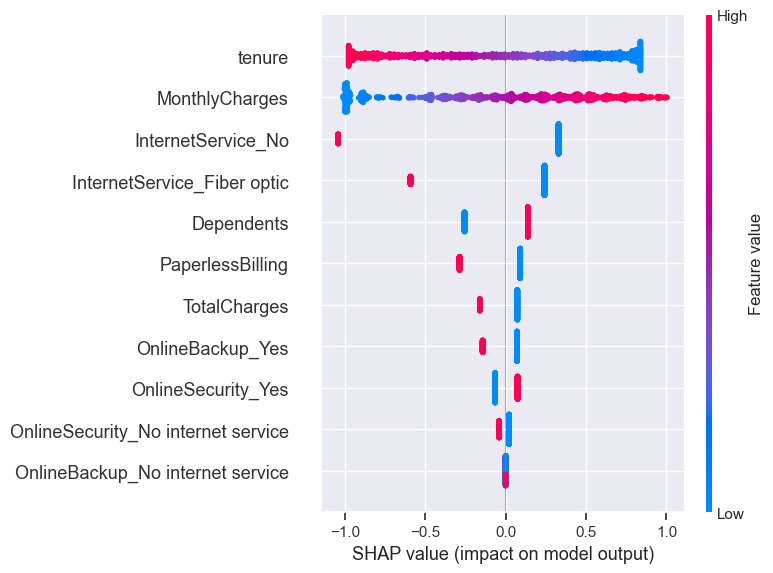

In [26]:
# Extract preprocessor and VIF selector from best pipeline
preprocessor_vif = ImbPipeline([
    ('preprocessor', best_tuned_pipeline.named_steps['preprocessor']),
    ('vif_selector', best_tuned_pipeline.named_steps['vif_selector'])
])

# Transform test data
X_test_preprocessed = preprocessor_vif.transform(X_test)

# Get feature names after preprocessing and VIF filtering
feature_names = get_feature_names(best_tuned_pipeline.named_steps['preprocessor'])
features_after_vif = [f for f in feature_names if f not in best_tuned_pipeline.named_steps['vif_selector'].features_to_drop_]

# Get trained classifier
model = best_tuned_pipeline.named_steps['classifier']

# Create SHAP explainer and calculate SHAP values
explainer = shap.LinearExplainer(model, X_test_preprocessed, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_test_preprocessed)

# Plot SHAP summary
shap.summary_plot(shap_values, features=X_test_preprocessed, feature_names=features_after_vif)

### 5.4 Confusion Matrix Visualization

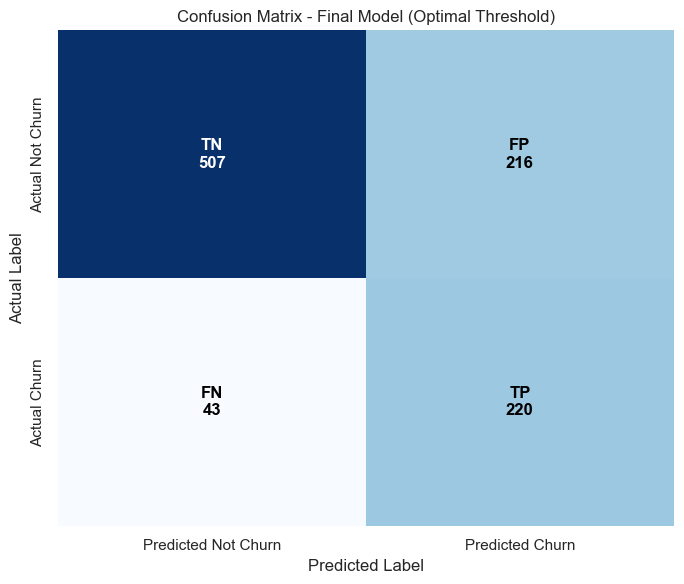

In [27]:
# Compute confusion matrix for adjusted threshold predictions
cm = confusion_matrix(y_test, y_pred)
class_labels = ['Not Churn', 'Churn']

plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues', cbar=False,
            xticklabels=[f'Predicted {label}' for label in class_labels],
            yticklabels=[f'Actual {label}' for label in class_labels])

# Add annotations for TP, TN, FP, FN
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        if i == 0 and j == 0:
            label = f'TN\n{cm[i, j]}'
        elif i == 1 and j == 1:
            label = f'TP\n{cm[i, j]}'
        elif i == 0 and j == 1:
            label = f'FP\n{cm[i, j]}'
        else:  # i == 1 and j == 0
            label = f'FN\n{cm[i, j]}'
        plt.text(j + 0.5, i + 0.5, label,
                 horizontalalignment='center',
                 verticalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black',
                 fontsize=12, fontweight='bold')

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Final Model (Optimal Threshold)')
plt.tight_layout()
plt.show()

## Section 6. Deployment
### 6.1 Save Model Using Joblib

In [28]:
# Save the best pipeline
model_filename = 'best_churn_model.joblib'
joblib.dump(best_tuned_pipeline, model_filename)
print(f"Model saved to {model_filename}")

Model saved to best_churn_model.joblib


### 6.2 How to Load and Use Saved Model

In [29]:
# Load model
loaded_model = joblib.load(model_filename)

# Example prediction
sample = X_test.iloc[:5]
display(sample)
predictions = loaded_model.predict(sample)
print("Sample predictions:", predictions)

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,TotalCharges
4659,No,45,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,87.25,3926.25
3272,No,10,Yes,No,Fiber optic,No,No,Month-to-month,Yes,78.15,781.50
898,No,44,Yes,Yes,DSL,Yes,No,One year,Yes,61.50,2706.00
1084,No,4,No,No,DSL,No,No,Month-to-month,No,55.50,222.00
4599,Yes,61,No internet service,No internet service,No,No internet service,No internet service,Two year,Yes,25.00,1525.00


Sample predictions: [1 1 0 1 0]


### 6.3 Model Limitations
- Model depends on data quality and feature relevance.
- Changes in customer behavior or services may reduce model accuracy over time.
- Periodic retraining and monitoring are recommended.

## Section 7. Conclusion and Recommendations
### 7.1 Conclusion
- Developed model predicts churn with good recall and ROC-AUC.
- Identified key factors influencing churn with interpretable methods.
- Threshold tuning improved recall, important for business objectives.

### 7.2 Recommendations
- Regularly update and monitor model performance.
- Use insights to improve customer retention strategies.
- Consider deploying model with monitoring for data drift.

## References

Bhatnagar, A., & Srivastava, S. (2025). *Customer churn analysis in telecom. Computing Online.* https://computingonline.net/computing/article/view/3873

BlastChar. (2018). *Telco customer churn prediction*. Kaggle. https://www.kaggle.com/datasets/blastchar/telco-customer-churn

Britto, F. (2024, September 9). *Churn in telecom: What it is and its impacts.* SYDLE. https://www.sydle.com/blog/churn-telecom-66b4c9e8b2713612fa17da85

Imhoff, C., Galemmo, N., & Geiger, J. G. (2003). *Mastering Data Warehouse Design: Relational and Dimensional Techniques.* John Wiley & Sons.

Investopedia Team. (2024, March 21). *Churn rate: What it means, examples, and calculations.* Investopedia. https://www.investopedia.com/terms/c/churnrate.asp

IQ Team. (2025, February 23). *Top 17 customer churn datasets and projects (Updated for 2025).* Interview Query. https://www.interviewquery.com/p/customer-churn-datasets

Kumari, D., Singh, S. K., Katira, S. S., Srinivas, I. V., & Salunkhe, U. (2025). *Telecom customer churn forecasting using machine learning: A data-driven predictive framework.* Metallurgical and Materials Engineering, 31(4), 922-929. https://doi.org/10.63278/1536

Luck, I. (2023, April 4). *What is customer churn? Complete meaning & guide.* CustomerGauge. https://customergauge.com/customer-churn

McKinney, W. (2017). *Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython (2nd ed.).* O'Reilly Media.

O'Brien, K., & Downie, A. (2024, September 9). *What is customer churn?* IBM. https://www.ibm.com/think/topics/customer-churn

Oracle Community. (2024).* OAC - Table visualization in DV duplicate rows, but LSQL is correct.* Retrieved from https://community.oracle.com/products/oracleanalytics/discussion/21184/oac-table-visualization-in-dv-duplicate-rows-but-lsql-is-correct

VanderPlas, J. (2016). *Python Data Science Handbook: Essential Tools for Working with Data.* O'Reilly Media.

Wickham, H., & Grolemund, G. (2017). *R for Data Science: Import, Tidy, Transform, Visualize, and Model Data.* O'Reilly Media.

- Scikit-learn documentation: https://scikit-learn.org/stable/
- SHAP documentation: https://shap.readthedocs.io/en/latest/
- Statsmodels documentation: https://www.statsmodels.org/stable/index.html
- Imbalanced-learn documentation: https://imbalanced-learn.org/stable/
- Variance Inflation Factor explanation: https://www.statsmodels.org/stable/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html